In [67]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## my code
import federated_model
import regular_oncompare

# check logistic regression curve

In [61]:
mutation_status_negatives, mutation_status_positives, covariates_negatives, covariates_positives = regular_oncompare.getData("all_data.csv.no_outlier")
scale = True
X, y, common_samples, common_samples1, common_samples2 = regular_oncompare.prep_data(mutation_status_negatives, mutation_status_positives, covariates_negatives, covariates_positives, scale)

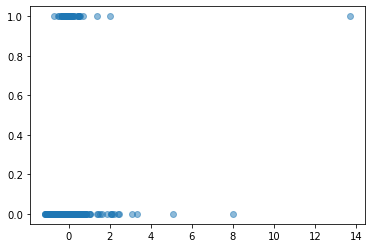

In [68]:
# explora data
# plt.clf()
plt.scatter(X, y, alpha=0.5)
plt.show()

Text(0.5, 0, 'TMB')

Text(0, 0.5, 'TP53')

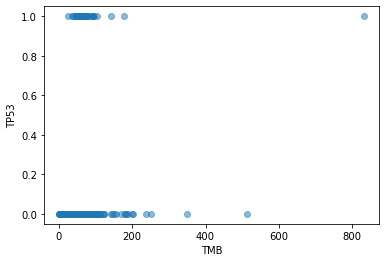

In [69]:
# unscaled:
dataY = np.append(mutation_status_negatives["TP53"].to_numpy(), mutation_status_positives["TP53"].to_numpy())
dataX = np.append(covariates_negatives["TMB"].to_numpy(), covariates_positives["TMB"].to_numpy())
# plt.clf()
plt.xlabel("TMB")
plt.ylabel("TP53")
plt.scatter(dataX, dataY,alpha=0.5)
plt.show()

## sklearn log reg

In [70]:
from sklearn.linear_model import LogisticRegression
# logistic regression
lr = LogisticRegression(penalty='none') #C=C) #, **lr_kwargs)    
lr.fit(X, y)
federated_model.plotLogReg(lr, X, -20, 60)

LogisticRegression(penalty='none')

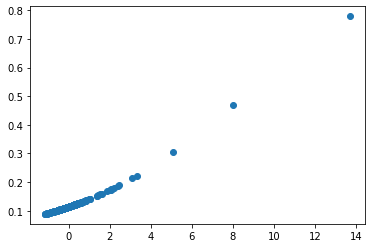

In [71]:
federated_model.plotLogRegX(lr, X)

## my log reg

In [72]:
my_lr = federated_model.MyLogisticRegBinary();
my_lr.fit(X, y)
federated_model.plotMyLogReg(my_lr, X, -20, 60)

converged after 280 iterations
Final Coefficients: [-1.6697443] & [0.1885135]


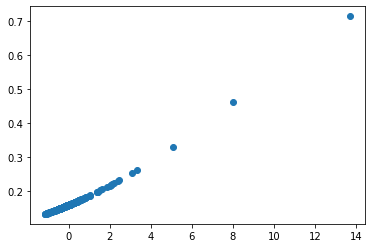

In [73]:
federated_model.plotMyLogRegX(my_lr, X)

# Test my logistic regression implementation
## prep data

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [8]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
X_train1, X_train2, y_train1, y_train2 = train_test_split(X_train, y_train, test_size = 0.5, random_state = 0)

X_train11, X_train12, y_train11, y_train12 = train_test_split(X_train1, y_train1, test_size = 0.5, random_state = 0)
X_train21, X_train22, y_train21, y_train22 = train_test_split(X_train2, y_train2, test_size = 0.5, random_state = 0)

X_train111, X_train112, y_train111, y_train112 = train_test_split(X_train11, y_train11, test_size = 0.4, random_state = 0)
X_train121, X_train122, y_train121, y_train122 = train_test_split(X_train12, y_train12, test_size = 0.4, random_state = 0)
X_train211, X_train212, y_train211, y_train212 = train_test_split(X_train21, y_train21, test_size = 0.3, random_state = 0)
X_train221, X_train222, y_train221, y_train222 = train_test_split(X_train22, y_train22, test_size = 0.4, random_state = 0)

In [10]:
X_train11

array([[-0.1144691 ],
       [-0.38718562],
       [ 0.17584203],
       [-0.14965833],
       [-0.16725294],
       [-0.22003679],
       [-0.29921255],
       [-0.25522602],
       [-0.05288795],
       [-0.14965833],
       [-0.19364487],
       [-0.17605025],
       [-0.14965833],
       [-0.08807718],
       [-0.18484756],
       [-0.35199639],
       [-0.1144691 ],
       [-0.39598293],
       [-0.17605025],
       [-0.08807718],
       [ 0.20223395],
       [ 0.71247776],
       [-0.00890142],
       [ 0.62450469],
       [ 0.05267973],
       [-0.26402332],
       [-0.47515869],
       [-0.08807718],
       [ 0.96759967],
       [-0.6071183 ],
       [-0.15845564],
       [-0.14965833],
       [-0.07048257],
       [ 0.21982857],
       [-0.28161794],
       [ 0.02628781],
       [ 0.65089661],
       [ 0.11426088],
       [-0.1144691 ],
       [ 1.16993773],
       [ 0.0086932 ],
       [ 0.20223395],
       [-0.21123948],
       [-0.26402332],
       [-0.31680716],
       [ 0

## logistic regression

In [11]:
from sklearn.metrics import accuracy_score
learning_rate=0.1
iterations=1000
print(X_train.shape)
print(y_train.shape)

# sklearn implementation:
log_reg = LogisticRegression(penalty='none', max_iter = iterations)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X)
acc= accuracy_score(y, y_pred)
print(f"all data accuracy: {acc}\n")

log_reg_part = LogisticRegression(penalty='none', max_iter = iterations)
log_reg.fit(X_train211, y_train211)
y_pred = log_reg.predict(X)
acc= accuracy_score(y, y_pred)
print(f"1/8 data accuracy: {acc}\n")

(338, 1)
(338, 1)


LogisticRegression(max_iter=1000, penalty='none')

all data accuracy: 0.8841607565011821



LogisticRegression(max_iter=1000, penalty='none')

1/8 data accuracy: 0.8841607565011821



In [12]:
my_log_reg_part = federated_model.MyLogisticRegBinary()
my_log_reg_part.fit(X_train222, y_train222, learning_rate=learning_rate, iterations=iterations)
acc = my_log_reg_part.predict_score(X_test, y_test)
print(f"1/8 data accuracy: {acc}\n")

converged after 165 iterations
Final Coefficients: [-1.72603899] & [0.34160528]
1/8 data accuracy: 0.8941176470588236



In [13]:
my_log_reg = federated_model.MyLogisticRegBinary()
my_log_reg.fit(X_train, y_train, learning_rate=learning_rate, iterations=iterations)
acc = my_log_reg.predict_score(X_test, y_test)
print(f"all data accuracy: {acc}\n")

converged after 165 iterations
Final Coefficients: [-1.74638795] & [0.08578256]
all data accuracy: 0.8941176470588236



## federated logistic regression

In [14]:
hospitals = []
hospitals.append(federated_model.federatedSystemWithSecurityLayer(X_train11, y_train11))
hospitals.append(federated_model.federatedSystemWithSecurityLayer(X_train12, y_train12))
hospitals.append(federated_model.federatedSystemWithSecurityLayer(X_train21, y_train21))
hospitals.append(federated_model.federatedSystemWithSecurityLayer(X_train22, y_train22))

fedLogReg = federated_model.FederatedLogisticRegression(hospitals)
fedLogReg.fit(hospitals,learning_rate, iterations)
acc = my_log_reg.predict_score(X_test, y_test)
print(f"federated accuracy: {acc}\n")

converged after 165 iterations
Final Coefficients: [-1.74638795] & [0.08578256]
federated accuracy: 0.8941176470588236

